# Esercitazione 2: Heart Disease

**1 - \[\*\]** 
- Importare le librerie **numpy**, **pandas** e **matplotlib.pyplot** con i rispettivi alias: **np**, **pd** e **plt**.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**2 - \[\*\]** 
- Caricare la tabella contenuta in *heart.csv*

In [2]:
edifici = pd.read_csv("building.csv")
edifici.head()

,Id,Nome,Ip,TabStorico
0,1,Edificio1,10.2.1.142,LogEdificioUno
1,2,Edificio2,10.2.3.254,LogEdificioDue
2,5,Edificio3,10.2.3.22,LogEdificioTre
3,6,Villa,10.2.3.14,LogVilla


In [20]:
gruppi = pd.read_csv("group.csv")
gruppi.head()

,Id,IdBuilding,GroupAddress,DataPoint,ValueType,Description
0,1,1,2/0/0,9.0,ppm,C1/0/M101 CO2
1,2,1,2/0/1,9.0,ppm,C1/0/M102 CO2
2,3,1,2/1/0,9.0,ppm,C1/0/U101 C02
3,4,1,2/1/1,9.0,ppm,C1/0/U105 C02
4,5,1,2/0/4,9.0,C,C1/0/M101 TEMP


In [14]:
with open('log2.csv') as f:
   print(f)

<_io.TextIOWrapper name='log2.csv' mode='r' encoding='cp1252'>


In [41]:
log = pd.read_csv("log2.csv", sep= ";", encoding='cp1252')
print(log['IdBuilding'].unique())
print(log['TelegramType'].unique())
print(log['ValueType'].unique())
print(log['Description'].unique())
log.head()

[1 5]
['write      ' 'response    ']
['W' '%' 'ppm' 'C°' 'Wh' 'bool']
['Produzione totale fotovoltaico' 'C1/0/M102 Umidità' 'C1/0/M101 CO2'
 'C1/0/U105 Umidità' 'C1/0/U101 C02' 'C1/0/U105 Temperatura'
 'C1/0/M101 Umidità' 'C1/0/U105 C02' 'C1/0/M102 TEMP'
 'C1/0/U101 Temperatura' 'C1/0/M102 CO2' 'C1/0/M101 TEMP'
 'C1/0/U101 Umidità' 'C3/0/U301 CO2'
 'Produzione totale Fotovoltaico Uffici' 'C3/0/U301 Rel. humidity'
 'C3/0/U301 Temperature' 'C3/0/U306 CO2 ' 'C3/0/U306 Temperature'
 'C3/0/U306 Rel. humidity' 'Produzione totale Fotovoltaico Palestra'
 'Consumo Palestra' 'C1/0/M102 Presenza' 'C1/0/R101 Presenza'
 'C1/0/R102 Presenza' 'Daikin Active Power Total'
 'Consumo totale E1 + Villa' 'Consumo enel di E1 + Villa'
 'Produzione totale fotovoltaic']


,Data,IdBuilding,IndividualAddress,GroupAddress,TelegramType,Value,ValueType,Description
0,2019-02-22 12:27:53.3233333,1,3.1.6,2/2/0,write,-33429.7,W,Produzione totale fotovoltaico
1,2019-02-22 12:28:56.4000000,1,3.1.201,2/0/3,write,35.68625,%,C1/0/M102 Umidità
2,2019-02-22 12:29:37.1766667,1,3.2.202,2/0/0,write,400.96,ppm,C1/0/M101 CO2
3,2019-02-22 12:30:21.9333333,1,3.3.201,2/1/8,write,36.86272,%,C1/0/U105 Umidità
4,2019-02-22 12:31:23.4800000,1,3.3.202,2/1/0,write,536.96,ppm,C1/0/U101 C02


In [51]:
data_json = log.head().to_dict(orient='records')
print(data_json)

[{'Data': '2019-02-22 12:27:53.3233333', 'IdBuilding': 1, 'IndividualAddress': '3.1.6', 'GroupAddress': '2/2/0', 'TelegramType': 'write      ', 'Value': '-33429.7', 'ValueType': 'W', 'Description': 'Produzione totale fotovoltaico'}, {'Data': '2019-02-22 12:28:56.4000000', 'IdBuilding': 1, 'IndividualAddress': '3.1.201', 'GroupAddress': '2/0/3', 'TelegramType': 'write      ', 'Value': '35.68625', 'ValueType': '%', 'Description': 'C1/0/M102 Umidità'}, {'Data': '2019-02-22 12:29:37.1766667', 'IdBuilding': 1, 'IndividualAddress': '3.2.202', 'GroupAddress': '2/0/0', 'TelegramType': 'write      ', 'Value': '400.96', 'ValueType': 'ppm', 'Description': 'C1/0/M101 CO2'}, {'Data': '2019-02-22 12:30:21.9333333', 'IdBuilding': 1, 'IndividualAddress': '3.3.201', 'GroupAddress': '2/1/8', 'TelegramType': 'write      ', 'Value': '36.86272', 'ValueType': '%', 'Description': 'C1/0/U105 Umidità'}, {'Data': '2019-02-22 12:31:23.4800000', 'IdBuilding': 1, 'IndividualAddress': '3.3.202', 'GroupAddress': '2/

In [47]:
description=pd.DataFrame(log['Description'].unique())
description





,0
0,Produzione totale fotovoltaico
1,C1/0/M102 Umidità
2,C1/0/M101 CO2
3,C1/0/U105 Umidità
4,C1/0/U101 C02
5,C1/0/U105 Temperatura
6,C1/0/M101 Umidità
7,C1/0/U105 C02
8,C1/0/M102 TEMP
9,C1/0/U101 Temperatura


**3 - \[\*\]** 
- Valutare la quantità di dati mancanti

In [18]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525483 entries, 0 to 525482
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Data               525483 non-null  object
 1   IdBuilding         525483 non-null  int64 
 2   IndividualAddress  525483 non-null  object
 3   GroupAddress       525483 non-null  object
 4   TelegramType       525483 non-null  object
 5   Value              525483 non-null  object
 6   ValueType          525483 non-null  object
 7   Description        525483 non-null  object
dtypes: int64(1), object(7)
memory usage: 32.1+ MB


**4 - \[\*\*\*\]**
- Le variabili categoriche del dataset non sono segnate come tali dato che hanno un valore numerico. Definire un vettore di feature categoriche, sapendo che le feature numeriche sono le seguenti: <br>

> numerical_features = \['age', 'trestbps', 'chol', 'thalach', 'oldpeak'\]

- Assegnare il tipo *category* alle colonne interessate. <br>

> Suggerimento: usare il metodo **.ASTYPE(new_type)** sul DataFrame. Restituisce un DF con colonne di tipo *new_type*.

In [42]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
type(numerical_features)
category_features = heart.columns.drop(numerical_features)
#list(category_features)
heart[list(category_features)] = heart[list(category_features)].astype('category')
#heart.info()
heart.dtypes


age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

**5 - \[\*\]**
- Mostrare una descrizione riassuntiva delle colonne **categoriche**
- Siamo in presenza di dataset bilanciato su la colonna *target*?

In [45]:
heart[list(category_features)].describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


In [57]:
print("Target 1:" + str(heart.target[heart.target == 1].count()))
print("Target 0:" + str(heart.target[heart.target == 0].count()))

Target 1:165
Target 0:138


**6 - \[\*\*\]** 
- Plottare una scatter matrix **per le sole feature numeriche**.<br>
- Individuare negli scatterplot le differenze di *target* tramite il colore dei punti.<br>

> Suggerimento: usare *pd.plotting.scatter_matrix(...)* specificando negli argomenti *figsize = (10,10)*

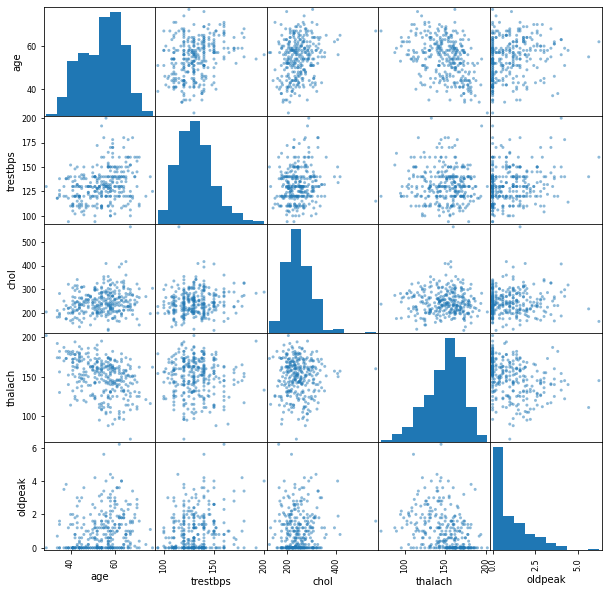

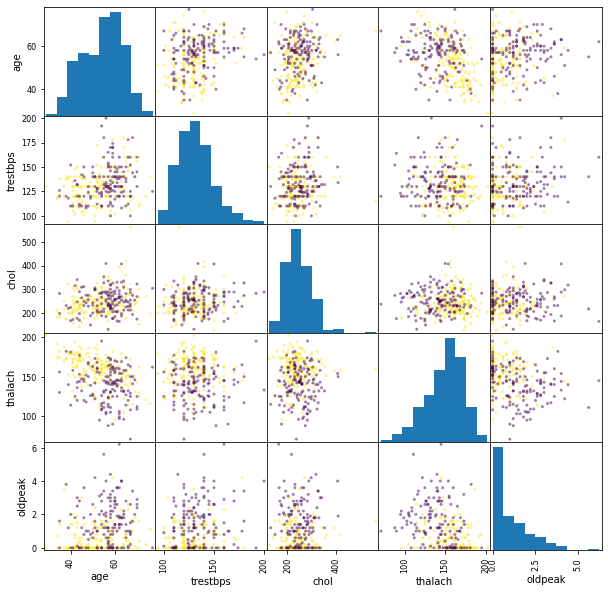

In [60]:
heart[numerical_features]
pd.plotting.scatter_matrix(heart[numerical_features], figsize = (10,10))
plt.show()
pd.plotting.scatter_matrix(heart[numerical_features], c = heart.target, figsize = (10,10))
plt.show()

**7 - \[\*\*\*\]** 
- Per ogni feature categorica, osservare come le categorie separano i valori di target.<br>

>Suggerimento: usare **.groupby(\[...\])**

In [194]:

heartCategory = heart[list(category_features)]
for i in list(heartCategory.columns.drop('target')):
    print(heartCategory[[str(i),'target']].groupby([str(i),'target'])[str(i)].count())

#### per verificare la quantità di qualche combinazione
#heartCategory.loc[heartCategory.cp == 0,["cp","target"]].loc[heartCategory.target == 0,["cp","target"]].count()
#heartCategory[['cp','target']][heartCategory.cp == 0][heartCategory.target == 0].count()

sex  target
0    0          24
     1          72
1    0         114
     1          93
Name: sex, dtype: int64
cp  target
0   0         104
    1          39
1   0           9
    1          41
2   0          18
    1          69
3   0           7
    1          16
Name: cp, dtype: int64
fbs  target
0    0         116
     1         142
1    0          22
     1          23
Name: fbs, dtype: int64
restecg  target
0        0         79
         1         68
1        0         56
         1         96
2        0          3
         1          1
Name: restecg, dtype: int64
exang  target
0      0          62
       1         142
1      0          76
       1          23
Name: exang, dtype: int64
slope  target
0      0          12
       1           9
1      0          91
       1          49
2      0          35
       1         107
Name: slope, dtype: int64
ca  target
0   0          45
    1         130
1   0          44
    1          21
2   0          31
    1           7
3   0        

**8 - \[\*\]** 
- Le feature numeriche sono standardizzate?<br> la variaanza non è unitaria.. direi che va standardizzato..

In [201]:

#data.describe()
dfHeart = heart[numerical_features].describe().loc[['mean', 'std']]
dfHeart.loc['variance'] = dfHeart.loc['std']**2  # dato ceh la varianza è la deviazione standard elevata al quadrato
dfHeart
# la varianza non è unitaria, è necessario.

,age,trestbps,chol,thalach,oldpeak
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
variance,82.484558,307.586453,2686.426748,524.646406,1.348095


**9 - \[\*\*\]** 
- Importare da *sklearn.preprocessing* la classe *StandardScaler*.<br>
- Inizializzare un modello *StandardScaler*. <br>
- Fittare il modello usando le sole colonne numeriche.<br>
- Trasformare le colonne numeriche con il modello fittato.<br>
- Osservare che le colonne interessate abbiano media 0 e deviazione standard pari a 1. (ma media non è assolutamente a 0)

In [206]:
from sklearn.preprocessing import StandardScaler

# scalo il dato normalizzandolo: genero un modello di Scaler che fa esattamente questo lavoro.
Scaler = StandardScaler() # settaggio iperparametri modello -> oggetto "Modello"

Scaler.fit(heart[numerical_features])

scaled = Scaler.transform(heart[numerical_features])
df_scaled = pd.DataFrame(scaled, columns = heart[numerical_features].columns)

#df_scaled.describe()
df2 = df_scaled.describe().loc[['mean', 'std']]
df2.loc['variance'] = df2.loc['std']**2
df2

,age,trestbps,chol,thalach,oldpeak
mean,4.690051e-17,-7.035077e-16,-1.113887e-16,-6.800574e-16,2.345026e-17
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
variance,1.003311e+00,1.003311e+00,1.003311e+00,1.003311e+00,1.003311e+00


**10 - \[\*\*\]** 
- Importare da *sklearn.manifold* la classe *Isomap*.<br>
- Inizializzare un modello *Isomap* con 3 componenti con un vicinato di 6 punti. <br>
- Fittare il modello usando il datest standardizzato (vedi punto precedente)<br>
- Trasformare il dataset standardizzato tramite il modello *Isomap* fittato.<br>

In [212]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=6, n_components=3)
iso.fit(df_scaled)
manifold_3Da = iso.transform(df_scaled)

**11 - \[\*\*\]** 
- Creare un DataFrame *heart_iso* usando il dataset trasformato via Isomap. 
- I nomi delle feature dovranno essere ISO1, ISO2, ISO3.

In [213]:
heart_iso = pd.DataFrame(manifold_3Da, columns=['ISO1', 'ISO2','ISO3'])
heart_iso

,ISO1,ISO2,ISO3
0,2.197852,-0.013691,-1.461621
1,-1.324609,-0.205459,-0.960439
2,-2.262300,-0.282998,-1.620113
3,-1.443064,-0.266858,-0.125135
4,-0.897076,2.548147,1.876019
...,...,...,...
298,0.913003,-0.065583,0.314633
299,-0.979828,-1.809148,1.721224
300,2.877821,-0.594723,-2.196609
301,0.526582,-2.397393,-0.429960


**12 - \[\*\*\]** 
- Plottare una scatter matrix per il dataset.<br>
- Individuare negli scatterplot le differenze di *target* tramite il colore dei punti.<br>

> Suggerimento: usare *pd.plotting.scatter_matrix(...)* specificando negli argomenti *figsize = (10,10)*

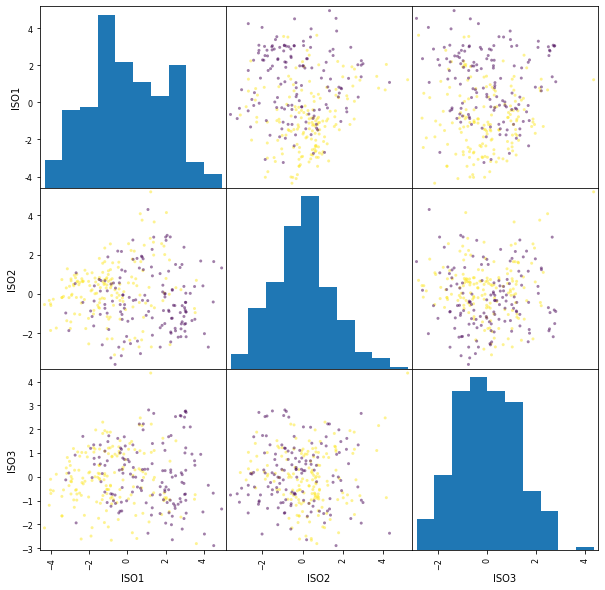

In [214]:
pd.plotting.scatter_matrix(heart_iso, c = heart.target, figsize = (10,10))
plt.show()

**13 - \[\*\*\]** 
- Dal dataset *heart* selezionare circa il 80% dei dati. Salvarli in un dataset *heart_train*

**Bonus! - \[\*\*\*\]** Dal dataset *heart* selezionare **casualmente** circa il 80% dei dati (con un margine massimo del 2%) e salvarlo in un dataset *heart_train*

- Salvare i dati rimanenti in un dataset *heart_test*
- Dal dataset *heart* estrapolare i dati di *target* corrispondenti alle righe selezionate per il dataset *heart_train* e salvarle in una serie *target_train*.
- Salvare i valori rimanenti di *target* in una serie *target_test*

In [285]:
#from random import choice
from random import randrange

p = 0.8
N = heart.shape[0]
numCampionam = int(N*p)
insieme = set()

sequence = [i for i in range(N)]
for i in range(numCampionam):
    index = randrange(len(sequence))
    insieme.add(sequence[index])
    del sequence[index]

print("Campionamento effettuato con margine:", np.abs((len(insieme)/N)-p))
heart_train = heart.loc[insieme]
heart_test = heart.loc[sequence]
target_train = pd.DataFrame(heart["target"][insieme])
target_test = pd.DataFrame(heart["target"][sequence])  


Campionamento effettuato con margine: 0.0013201320132013583


**14 - \[\*\*\]** 
- Dal modulo *sklearn.tree* importare la classe *DecisionTreeClassifier*
- Inizializzare un modello *DecisionTreeClassifier* inserendo tutti gli iperparametri richiesti, se necessario.
- Fittare il modello usando il metodo **.FIT(X_train, Y_train)**
- Valutare le performance del modello fittato usando il metodo **.SCORE(X_train, Y_train)**

L'output del metodo *.score*, è una statistica di nome *mean accuracy*. Ha valori compresi tra 0 e 1, ed è una media delle accuracy sulle varie categorie di *target* rappresenta la capacità del modello di classificare le osservazioni. <br>
In questo caso, rappresenta la percentuale di classificazione corretta del modello.

In [264]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(heart_train, target_train)
dtc.score(heart_train, target_train)

1.0

**15 - \[\*\]**
- Valutare il modello sul test dataset <br>

> Suggerimento: usare il metodo *.score* del modello addestrato sul test dataset

In [255]:
dtc.score(heart_test, target_test)

1.0

**16 - \[\*\*\]**
- Ci sono delle feature non utili al modello? <br>

> Suggerimento: usare l'attributo *.feature_importances_* del modello addestrato. Più è alto il peso, più importante è l'attributo   --> sembrerebbe tutte tranne target stesso

In [282]:
dtc.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])